In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("../Data/train-obesity.csv")
df_test = pd.read_csv("../Data/test-obesity.csv")
#your objective is to predict the class of NObeyesdad for each row

## Train EDA

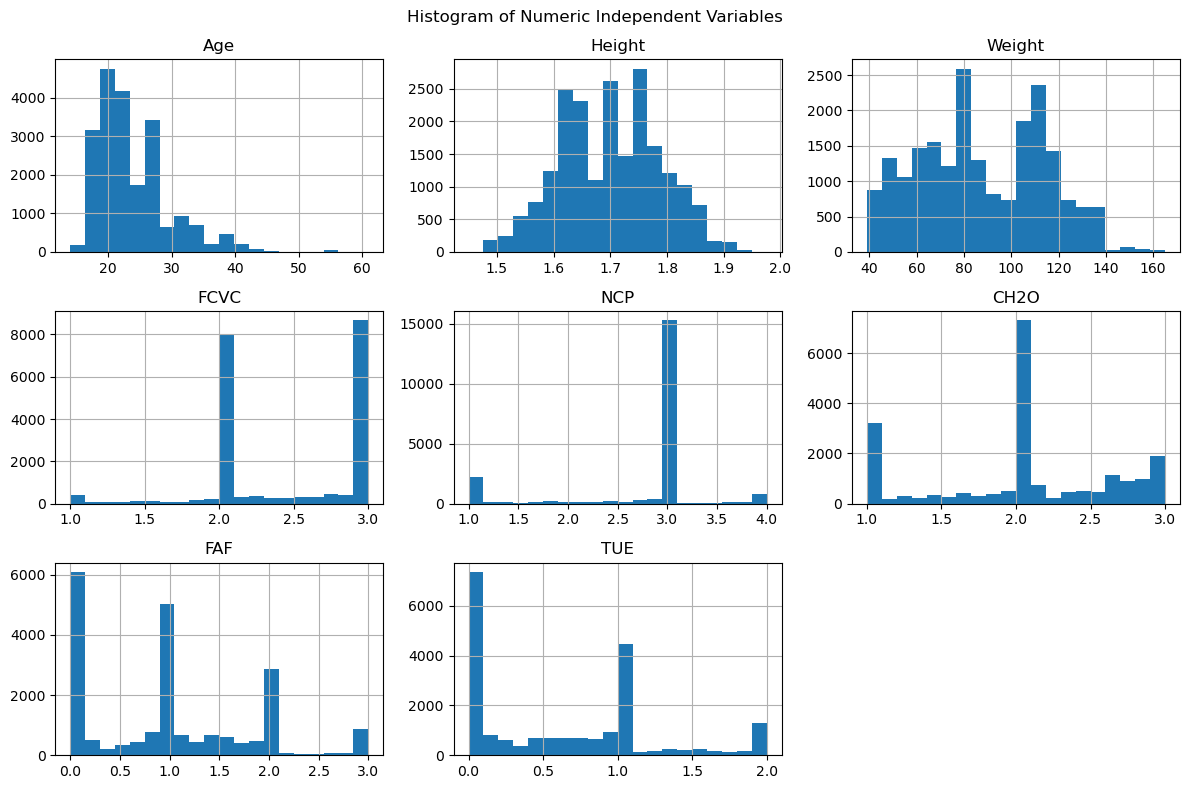

In [16]:
df_train.head(5)
# Notched box and whisker plot - x axis (categorical variable), y axis (distribution of one independent variable)
# Distributions of numeric data
num_col = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
df_train[num_col].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histogram of Numeric Independent Variables')
plt.tight_layout()
plt.show()


- Age seems to show a lognormal distribution, with many samples for younger adults and few samples for older adults
- Height and weight seem to show a normal distribution
- The rest do not show common distributions


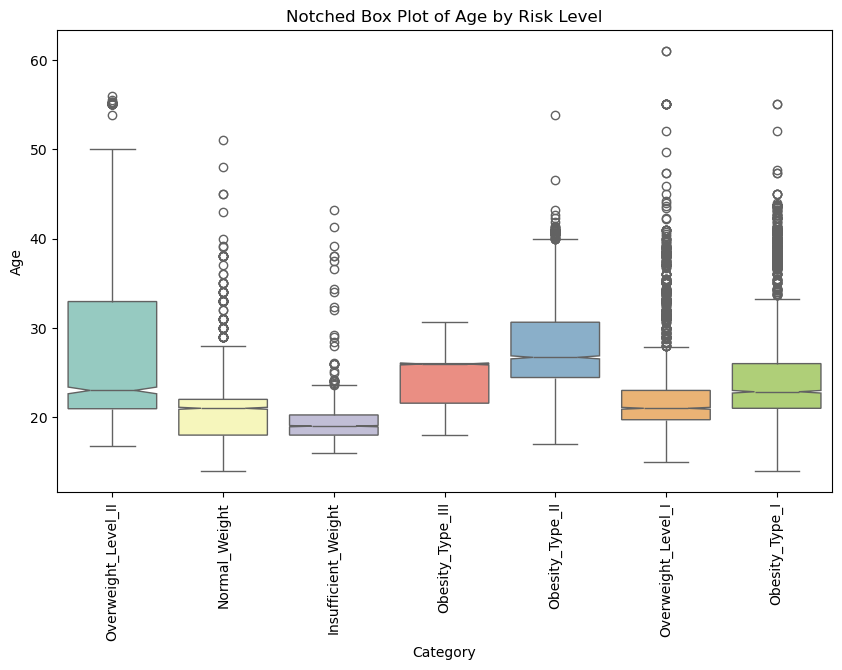

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='NObeyesdad', y='Age', hue='NObeyesdad', data=df_train, palette='Set3', notch=True)

plt.xlabel('Category')
plt.ylabel('Age')
plt.title('Notched Box Plot of Age by Risk Level')
plt.xticks(rotation=90)
plt.show()

There does not seem to be an obvious difference in obesity risk levels and age. We can see the overweight level II has a median of around 23 years and mean 26. The median is close to Q1 of 20, indicating that 50% of the values fall below 23. The mean of 26 years indicates that there are some extreme values that shift the mean, indicating a right skewed distribution 

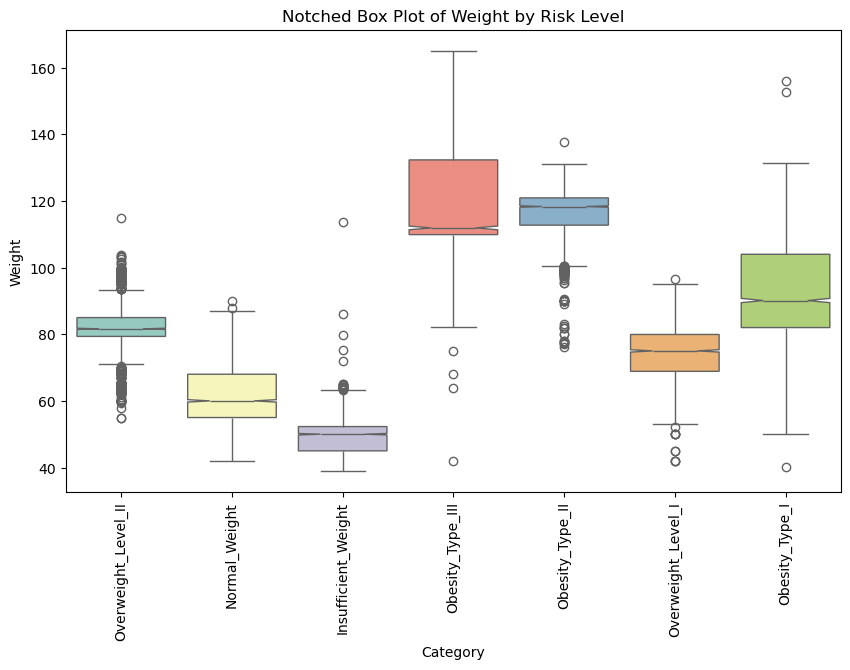

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='NObeyesdad', y='Weight', hue='NObeyesdad', data=df_train, palette='Set3', notch=True)

plt.xlabel('Category')
plt.ylabel('Weight')
plt.title('Notched Box Plot of Weight by Risk Level')
plt.xticks(rotation=90)
plt.show()

We can see a relationship with weight and risk level, which adheres to intuition. Risk levels with a higher weight distribution tend to fall in the obesity type III and II. The confidence intervals of the median at the notches do not overlap for these groups, which means there is a statistically significant difference between the medians. 

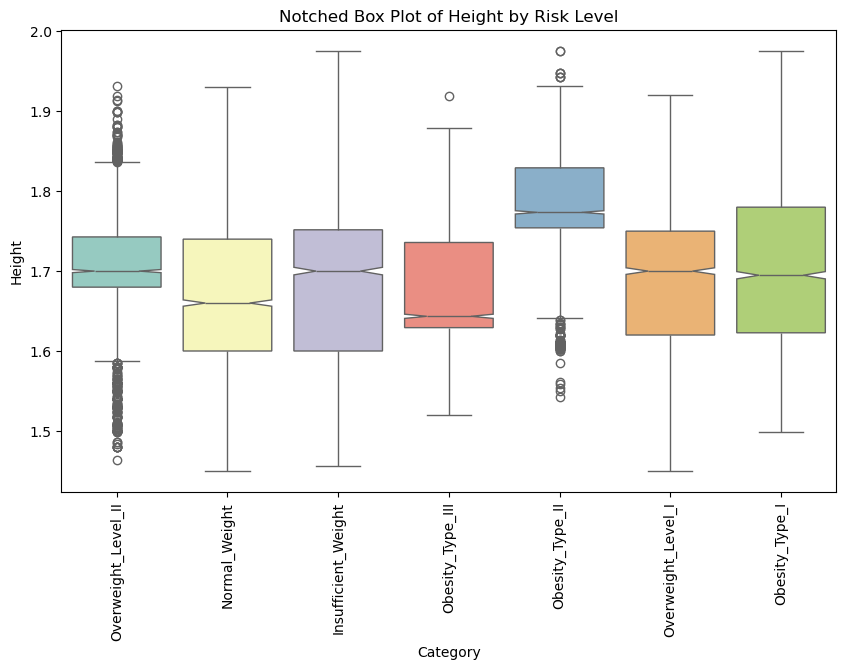

In [3]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='NObeyesdad', y='Height', hue='NObeyesdad', data=df_train, palette='Set3', notch=True)

plt.xlabel('Category')
plt.ylabel('Height')
plt.title('Notched Box Plot of Height by Risk Level')
plt.xticks(rotation=90)
plt.show()

Similar to age, there are no obvious differences in height by risk level

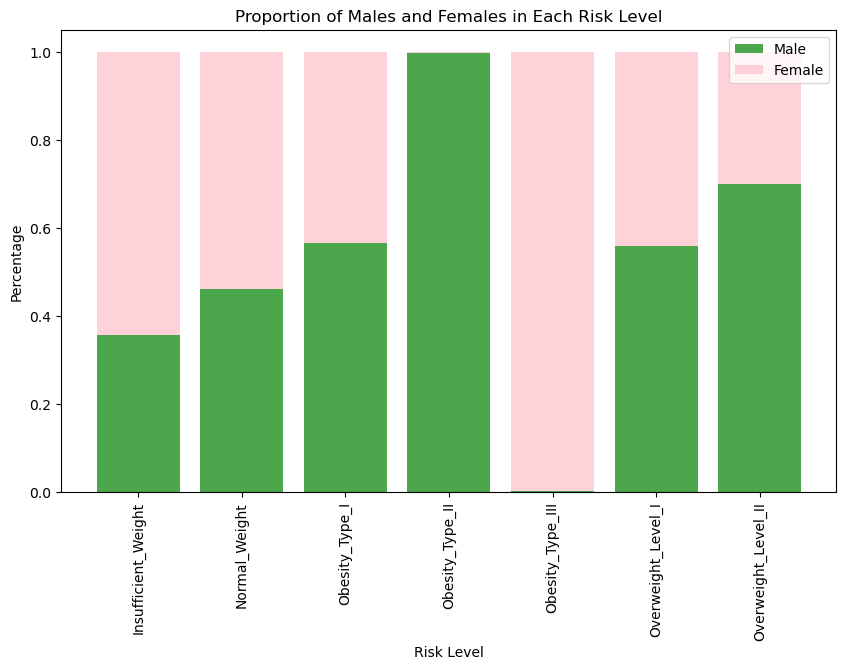

In [31]:
prop_male = df_train[df_train['Gender'] == 'Male'].groupby('NObeyesdad').size() / df_train.groupby('NObeyesdad')['Gender'].count()
prop_female = df_train[df_train['Gender'] == 'Female'].groupby('NObeyesdad').size() / df_train.groupby('NObeyesdad')['Gender'].count()
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting for males
ax.bar(prop_male.index, prop_male, label='Male', alpha=0.7, color='green')

# Plotting for females
ax.bar(prop_female.index, prop_female, label='Female', alpha=0.7, color='pink', bottom=prop_male)

ax.set_title('Proportion of Males and Females in Each Risk Level')
ax.set_xticks(range(len(prop_male.index)))
ax.set_xticklabels(prop_male.index, rotation=90)
ax.set_xlabel('Risk Level')
ax.set_ylabel('Percentage')
ax.legend()
plt.show()

Males and females both make up roughly half for each category except obesity type II and type III where males make up the majority of type II and females of type III